In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head(10)

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


Text(0, 0.5, 'Chemical concentration')

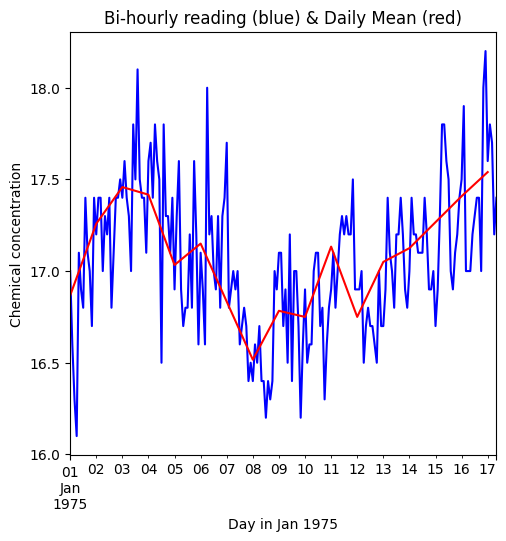

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/chemical-concentration-readings.csv')

datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid

daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Day in Jan 1975')
ax.set_ylabel('Chemical concentration')
#51

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
print('Shape of the dataset:', df.shape)
df.head(10)

Shape of the dataset: (1461, 2)


,Date,Mean temparature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


Text(0, 0.5, 'Temperature')

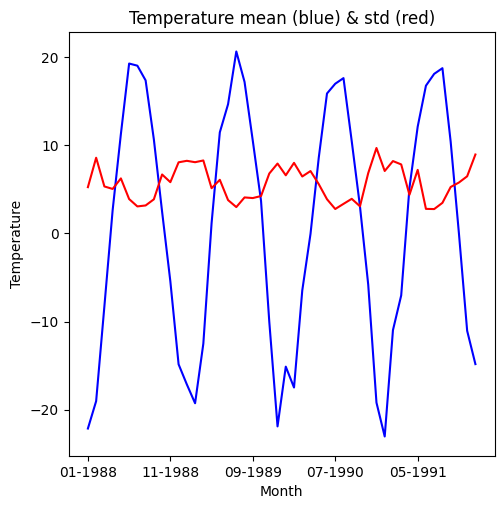

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')

datetime_rowid = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.index = datetime_rowid

df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

#monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median, np.std])
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate(['mean', 'median', 'std'])
monthly_stats.reset_index(inplace=True)

monthly_stats['Year'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)

monthly_stats.index = monthly_stats['Month_Year']  #.map(lambda d: pd.to_datetime(d, format='%m-%Y'))
#monthly_stats.head(20)
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')
ax.set_title('Temperature mean (blue) & std (red)')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')


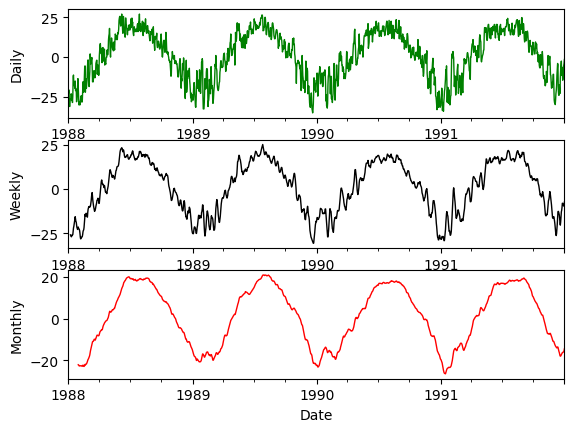

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')

datetime_rowid = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.index = datetime_rowid

weekly_moving_average = df['Mean temparature'].rolling(7).mean()

monthly_moving_average = df['Mean temparature'].rolling(30).mean()

# weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
# monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Daily')
df['Mean temparature'].plot(ax=ax1, color='g', lw=1.)
ax2 = fig.add_subplot(312, ylabel='Weekly')
weekly_moving_average.plot(ax=ax2, color='black', lw=1.)
ax3 = fig.add_subplot(313, ylabel='Monthly')
monthly_moving_average.plot(ax=ax3, color='r', lw=1.)
plt.show()